In [10]:
import seaborn as sns
import pandas as pd
import configparser
import matplotlib.pyplot as plt
import ast
import matplotlib.colors as mcolors

In [11]:
config = configparser.ConfigParser()
config.read('configs.ini')
result_file_directory = "../results/experiment1 20240813-1321.csv"
df = pd.read_csv(result_file_directory)

In [52]:
def safe_eval(model_str):
    try:
        model = ast.literal_eval(model_str)
        if isinstance(model, list):
            return model
    except (ValueError, SyntaxError):
        pass
    return model_str

def generate_label(method, model):
    if method == "Dummy" and model == "Dummy":
        return "Dummy"
    Method_number = "Method 1" if method == "different models" else "Method 2" if method == "different data" else "Method 3"
    model_ = safe_eval(model)
    
    if isinstance(model_, str):
        model_name = "Tree" if "Tree" in model else "Regression" if "Regression" in model else "KNN"
    else:
        first_model = "Tree" if "Tree" in model_[0] else "Regression" if "Regression" in model_[0] else "KNN"
        second_model = "Tree" if "Tree" in model_[1] else "Regression" if "Regression" in model_[1] else "KNN"
        model_name = first_model +"+"+ second_model
    return Method_number + " " + model_name

df['Initial Brier'] = df['Initial Brier'].apply(safe_eval)
df['Final Brier'] = df['Final Brier'].apply(safe_eval)
df['Method_Model_Label'] = df.apply(lambda row: generate_label(row['Method'], row['Models']), axis=1)

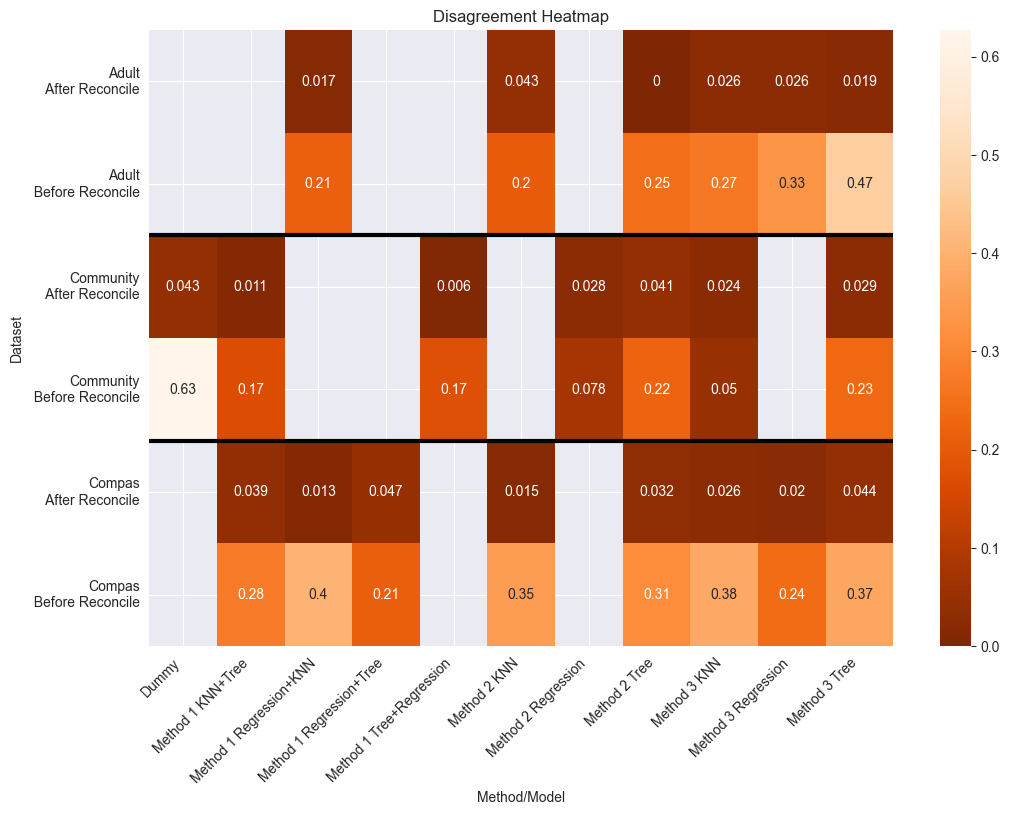

In [62]:
plot_data = pd.DataFrame({
    'Disagreement': df['Initial Disagreement'].tolist() + df['Final Disagreement'].tolist(),
    'Dataset': [f"{name.replace('_Data','')}\n Before Reconcile" for name in df['Data']] + [f"{name.replace('_Data','')}\n After Reconcile" for name in df['Data']],
    'Method/Model': df['Method_Model_Label'].tolist() * 2
})
# Pivot the data for heatmap
heatmap_data =plot_data.pivot(index="Dataset", columns="Method/Model", values="Disagreement")

# Plotting the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, cmap="Oranges_r")
plt.title("Disagreement Heatmap")
plt.xticks(rotation=45, ha='right')
# cmap.set_bad('black')
for idx in range(2, len(heatmap_data.index), 2):
    ax.hlines(idx, *ax.get_xlim(), color='black', linewidth=3)
plt.show()

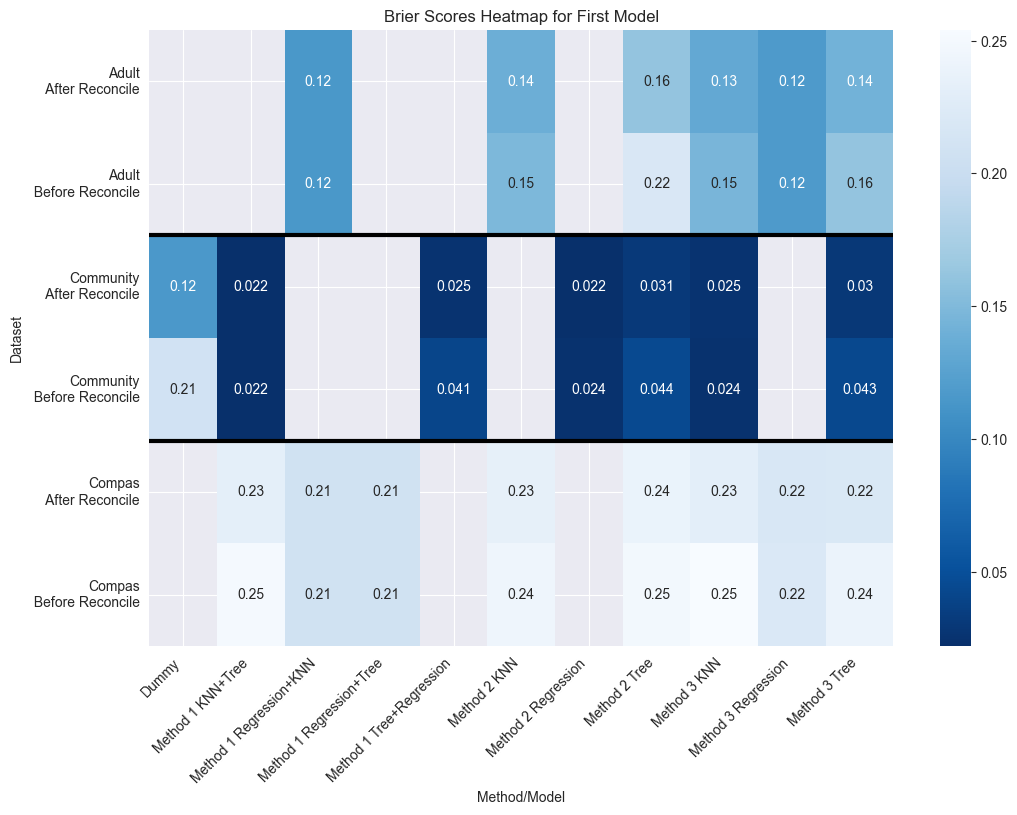

In [63]:
plot_data = pd.DataFrame({
    'Brier Score': [scores[0] for scores in df['Initial Brier']] + [scores[0] for scores in df['Final Brier']],
    'Dataset': [f"{name.replace('_Data','')}\n Before Reconcile" for name in df['Data']] + [f"{name.replace('_Data','')}\n After Reconcile" for name in df['Data']],
    'Method/Model': df['Method_Model_Label'].tolist() * 2
})

# Pivot the data for heatmap
heatmap_data =plot_data.pivot(index="Dataset", columns="Method/Model", values="Brier Score")

# Plotting the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, cmap="Blues_r")
plt.title("Brier Scores Heatmap for First Model")
plt.xticks(rotation=45, ha='right')
# cmap.set_bad('black')
for idx in range(2, len(heatmap_data.index), 2):
    ax.hlines(idx, *ax.get_xlim(), color='black', linewidth=3)
plt.show()

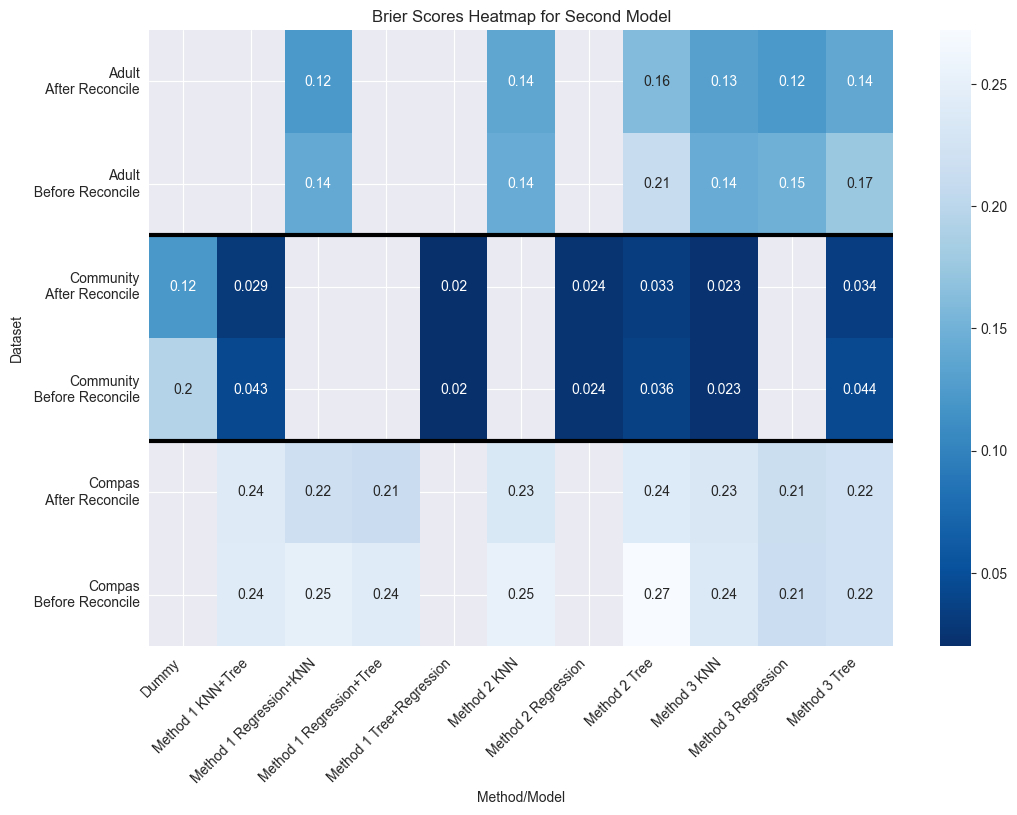

In [64]:
plot_data = pd.DataFrame({
    'Brier Score': [scores[1] for scores in df['Initial Brier']] + [scores[1] for scores in df['Final Brier']],
    'Dataset': [f"{name.replace('_Data','')}\n Before Reconcile" for name in df['Data']] + [f"{name.replace('_Data','')}\n After Reconcile" for name in df['Data']],
    'Method/Model': df['Method_Model_Label'].tolist() * 2
})

# Pivot the data for heatmap
heatmap_data =plot_data.pivot(index="Dataset", columns="Method/Model", values="Brier Score")

# Plotting the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, cmap="Blues_r")
plt.title("Brier Scores Heatmap for Second Model")
plt.xticks(rotation=45, ha='right')
# cmap.set_bad('black')
for idx in range(2, len(heatmap_data.index), 2):
    ax.hlines(idx, *ax.get_xlim(), color='black', linewidth=3)
plt.show()